# EDA : Handle Missing Value

In [1]:
train.info()

NameError: name 'train' is not defined

In [119]:
# 결측치 처리 : 결측치 처리는 train / test를 함께 처리 그러나 test셋에서 y값을 모르므로 train셋만 가지고 판단!

In [120]:
# 결측치 가져오기
Miss_Handle_df = train.copy()
Miss_Handle_df.drop(['CarInsurance','Id'],axis=1,inplace=True)
print(Miss_Handle_df.shape)

(3971, 17)


In [121]:
total = Miss_Handle_df.isnull().sum()
Prob = total/Miss_Handle_df.isnull().count()
NAs = pd.concat([total,Prob],axis=1,keys=('Total','Prob'))
NAs[NAs.Total>0].sort_values(by='Total',ascending=False)

,Total,Prob
Outcome,3019,0.760262
Communication,897,0.225888
Education,164,0.041299
Job,19,0.004785


## Missing : Outcome

In [122]:
# 결측치 방안은?
# Outcome이 NAN에 대해서 PrevAttempts와 DayPassed를 살펴보자
# Outcome이 NAN은 현재 마케팅 대상인 고객에 대해서 접촉하지 않아서 발생하는 결측치라고 판단됨

In [123]:
Prev_NA_ls = list(Miss_Handle_df[Miss_Handle_df.PrevAttempts == 0].index)

In [124]:
DayPassed_NA_ls = list(Miss_Handle_df[Miss_Handle_df.DaysPassed == -1].index)

In [125]:
# 결측값 찾기 관련 : https://hyemin-kim.github.io/2020/06/12/S-Python-Pandas6/
# Outcome 결측값에 해당하는 인덱스
Outcome_ls = list(Miss_Handle_df.loc[Miss_Handle_df['Outcome'].isna()].index)

In [126]:
Prev_NA_ls == Outcome_ls

True

In [127]:
Prev_NA_ls == Outcome_ls

True

In [128]:
# Outcome의 결측치 대처방안 : 새로운 변수를 추가한다. None

In [129]:
Miss_Handle_df.loc[Miss_Handle_df['PrevAttempts']==0,'Outcome']='NonePrev'

In [130]:
# 결측치 제거 재확인
sum(Miss_Handle_df.Outcome.isna())

0

## Missing : Job & Education

### Missing : Job & Education - Age 26 under

In [131]:
# Education, Job에 대한 결측치 해결 방안
# 1. Age와 관련이 있을 것이다.
# 2. 따라서 Age를 세 구간으로 나누어 확인 해보자

In [132]:
# 1. 26세 미만

In [133]:
Miss_Handle_Young_df = Miss_Handle_df[Miss_Handle_df.Age < 26]

In [134]:
Miss_Handle_Young_df.isna().sum()

Age                  0
Job                  0
Marital              0
Education           20
Default              0
Balance              0
HHInsurance          0
CarLoan              0
Communication       30
LastContactDay       0
LastContactMonth     0
NoOfContacts         0
DaysPassed           0
PrevAttempts         0
Outcome              0
Call_StartHour       0
Call_Duration        0
dtype: int64

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


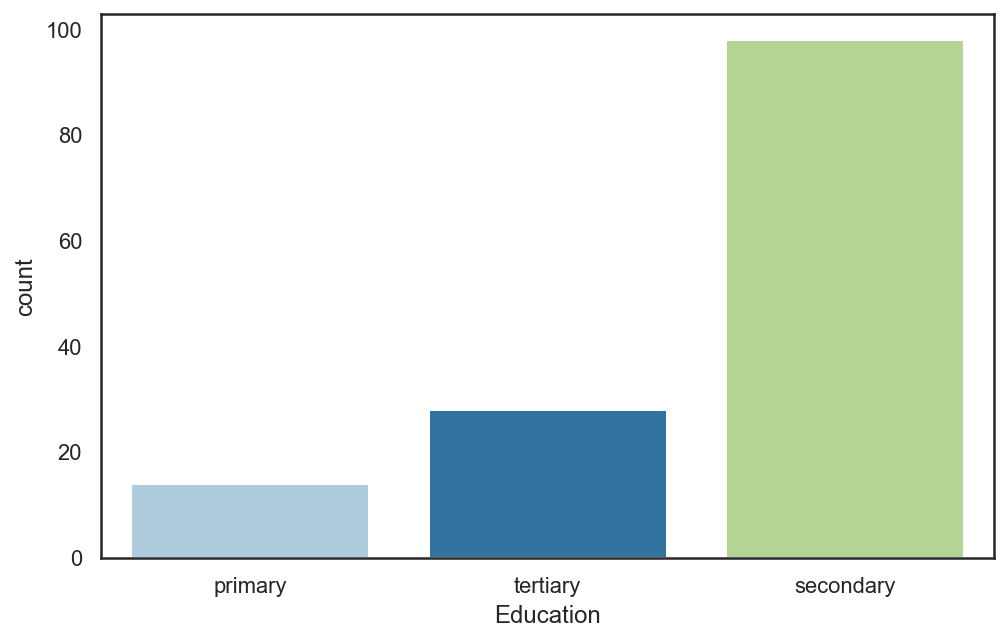

In [135]:
with sns.axes_style('white'):
    plt.figure(figsize=(8,5))
    sns.countplot(Miss_Handle_Young_df.Education, palette = 'Paired')

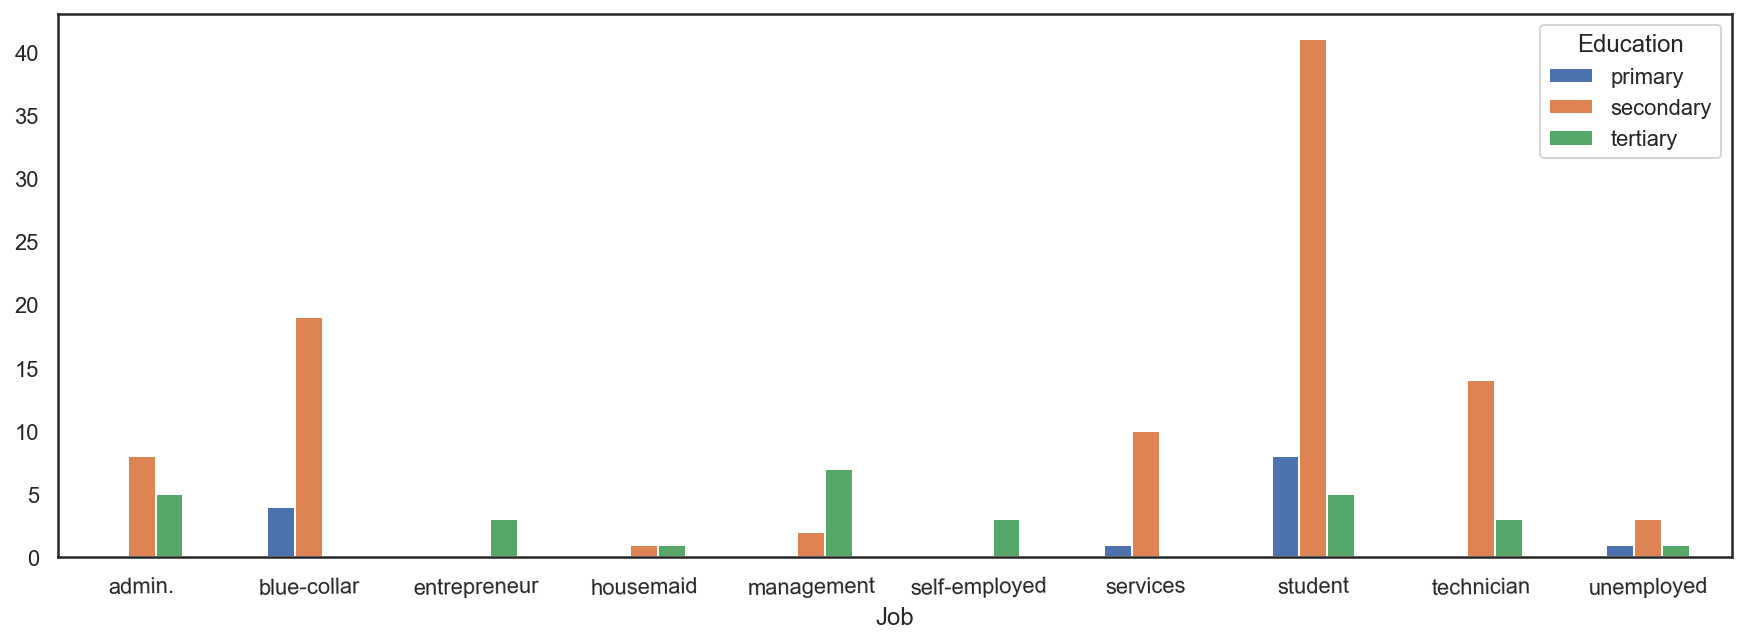

In [136]:
with sns.axes_style('white'):
    pd.crosstab(Miss_Handle_Young_df.Job, Miss_Handle_Young_df.Education).plot(kind = 'bar' , rot =1, figsize=(15,5))

In [137]:
list(np.unique(Miss_Handle_Young_df[Miss_Handle_Young_df['Education'].isna()].Job))

['management', 'self-employed', 'services', 'student', 'technician']

In [138]:
Miss_Handle_Young_df.Education.value_counts()

secondary    98
tertiary     28
primary      14
Name: Education, dtype: int64

In [139]:
# 결측치 : https://doong-e.tistory.com/27
# management
management_ls = Miss_Handle_Young_df[(Miss_Handle_Young_df['Education'].isna()) & (Miss_Handle_Young_df['Job'] == 'management')].index

Miss_Handle_df.loc[management_ls, 'Education'] = 'tertiary'

In [140]:
Miss_Handle_df.loc[management_ls]

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,Call_StartHour,Call_Duration
394,24,management,married,tertiary,0,448,0,0,cellular,14,apr,1,-1,0,NonePrev,12,5.4


In [141]:
# 결측치
# self-employed
self_ls = Miss_Handle_Young_df[(Miss_Handle_Young_df['Education'].isna()) & (Miss_Handle_Young_df['Job'] == 'self-employed')].index

Miss_Handle_df.loc[self_ls, 'Education'] = 'tertiary'

In [142]:
Miss_Handle_df.loc[self_ls]

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,Call_StartHour,Call_Duration
2361,25,self-employed,single,tertiary,0,1179,0,0,cellular,17,aug,1,83,2,failure,13,0.716667


In [143]:
# 결측치
# services
services_ls = Miss_Handle_Young_df[(Miss_Handle_Young_df['Education'].isna()) & (Miss_Handle_Young_df['Job'] == 'services')].index

Miss_Handle_df.loc[services_ls, 'Education'] = 'secondary'

In [144]:
Miss_Handle_df.loc[services_ls]

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,Call_StartHour,Call_Duration
14,25,services,single,secondary,0,2022,0,0,cellular,29,jul,8,97,12,other,14,4.6


In [145]:
# 결측치
# student
student_idx = Miss_Handle_Young_df[(Miss_Handle_Young_df['Education'].isna()) & (Miss_Handle_Young_df['Job'] == 'student')].index

Miss_Handle_df.loc[student_idx, 'Education'] = 'secondary'

In [146]:
Miss_Handle_df.loc[student_idx]

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,Call_StartHour,Call_Duration
296,20,student,single,secondary,0,457,0,0,cellular,16,jun,1,-1,0,NonePrev,12,3.566667
312,25,student,single,secondary,0,722,0,0,telephone,21,apr,2,-1,0,NonePrev,15,10.383333
336,20,student,single,secondary,0,829,0,0,cellular,9,jul,2,-1,0,NonePrev,13,4.216667
470,18,student,single,secondary,0,108,0,0,cellular,10,aug,1,-1,0,NonePrev,13,2.783333
1566,21,student,single,secondary,0,200,0,0,NaN,1,jun,1,-1,0,NonePrev,12,0.133333
1690,18,student,single,secondary,0,108,0,0,cellular,9,feb,1,183,1,success,9,1.533333
1695,24,student,single,secondary,0,358,0,0,cellular,14,jun,1,384,1,other,15,4.083333
1831,22,student,single,secondary,0,2281,0,0,cellular,8,sep,1,-1,0,NonePrev,11,3.683333
1890,18,student,single,secondary,0,108,0,0,cellular,8,sep,1,-1,0,NonePrev,11,2.816667
1894,20,student,single,secondary,0,829,0,0,cellular,27,jan,3,202,2,success,10,3.266667


In [147]:
# 결측치
# technician
technician_idx = Miss_Handle_Young_df[(Miss_Handle_Young_df['Education'].isna()) & (Miss_Handle_Young_df['Job'] == 'technician')].index

Miss_Handle_df.loc[technician_idx, 'Education'] = 'secondary'

In [148]:
Miss_Handle_df.loc[technician_idx]

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,Call_StartHour,Call_Duration
3057,23,technician,single,secondary,0,710,1,0,NaN,19,may,6,-1,0,NonePrev,10,6.233333


In [149]:
Miss_Handle_df[Miss_Handle_df.Age < 26].Education.isna().sum()

0

In [150]:
# 26세 이상 ~ 40세 미만

In [151]:
Miss_Handle_Mid_df = Miss_Handle_df[(Miss_Handle_df.Age >= 26) & (Miss_Handle_df.Age < 40)]

In [152]:
Miss_Handle_Mid_df.isna().sum()

Age                   0
Job                   6
Marital               0
Education            47
Default               0
Balance               0
HHInsurance           0
CarLoan               0
Communication       426
LastContactDay        0
LastContactMonth      0
NoOfContacts          0
DaysPassed            0
PrevAttempts          0
Outcome               0
Call_StartHour        0
Call_Duration         0
dtype: int64

### Missing : Job & Education - Between Age 26 and Age 40 under 

In [153]:
# 26세 이상 ~ 40세 미만의 결측치 특징
# 1. Job & Education 모두 결측치가 있는 경우 : 고민사항
# 2. Education에서 결측치가 있는 경우 : Education - Job에서 최빈값으로 대체
# 3. Job에서 결측치가 있는 경우 : Job - Education에서 최빈값으로 대체

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


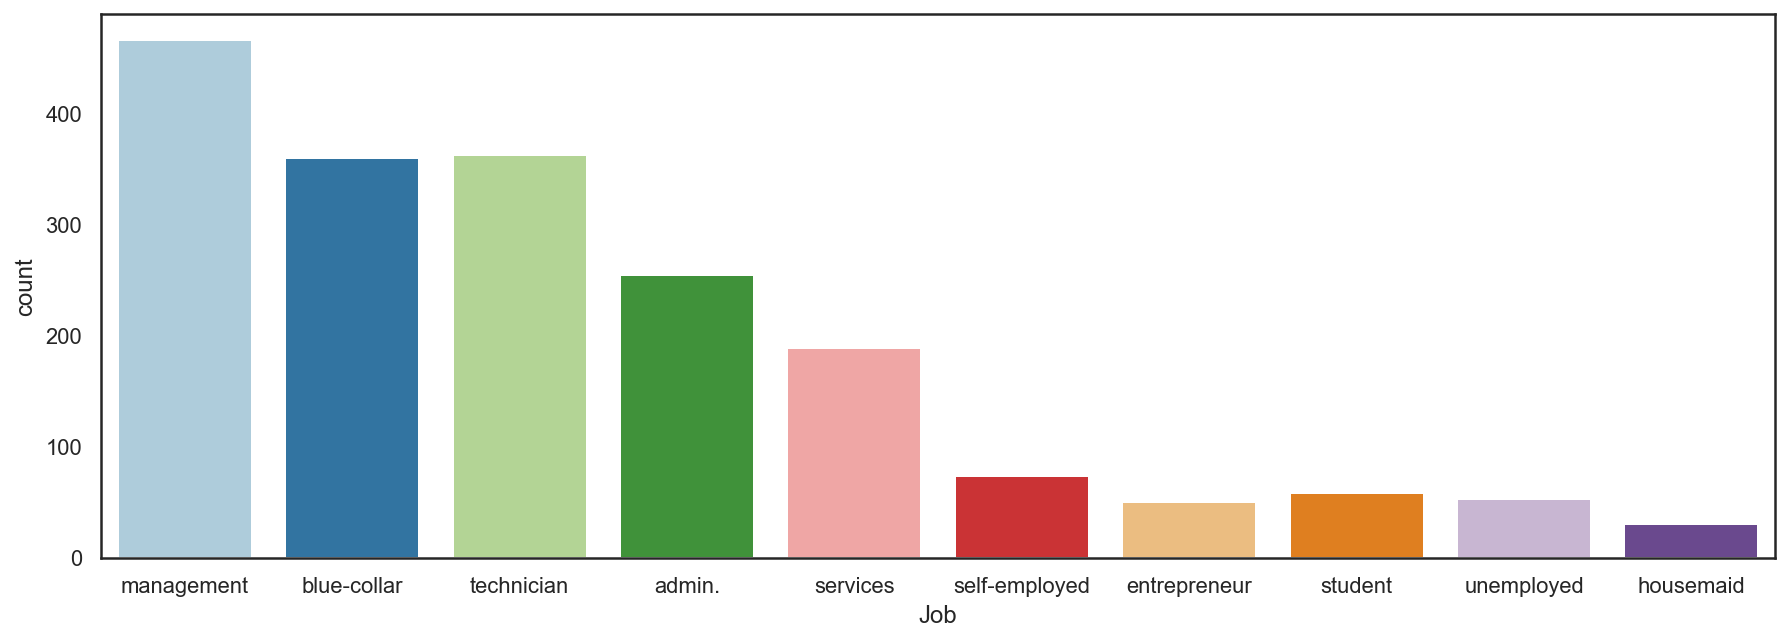

In [154]:
with sns.axes_style('white'):
    plt.figure(figsize=(15,5))
    sns.countplot(Miss_Handle_Mid_df.Job, palette = 'Paired')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


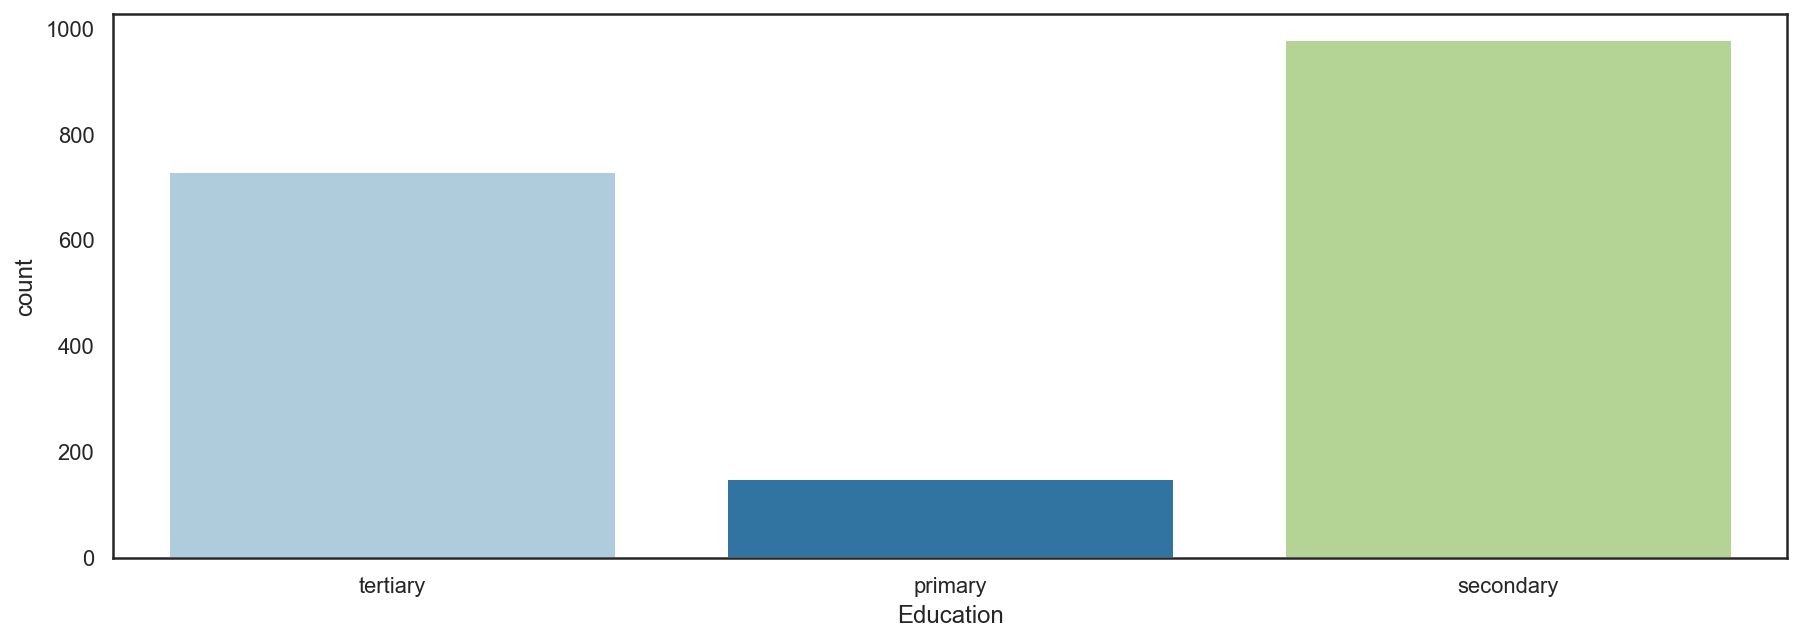

In [155]:
with sns.axes_style('white'):
    plt.figure(figsize=(15,5))
    sns.countplot(Miss_Handle_Mid_df.Education, palette = 'Paired')

In [156]:
## 1. Job & Education 모두 결측치가 있는 경우
## 다양성을 위해 Education을 secondary로 대체
Miss_Handle_Mid_df[(Miss_Handle_Mid_df.Job.isna()) & (Miss_Handle_Mid_df.Education.isna())]

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,Call_StartHour,Call_Duration
2842,28,NaN,single,NaN,0,326,0,0,cellular,11,oct,1,231,1,success,10,7.500000
3615,39,NaN,single,NaN,0,0,0,0,telephone,28,jan,1,-1,0,NonePrev,10,0.466667


In [157]:
all_idx = Miss_Handle_Mid_df[(Miss_Handle_Mid_df.Job.isna()) & (Miss_Handle_Mid_df.Education.isna())].index

Miss_Handle_df.loc[all_idx, 'Education'] = 'secondary'

In [158]:
Miss_Handle_df.loc[all_idx]

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,Call_StartHour,Call_Duration
2842,28,NaN,single,secondary,0,326,0,0,cellular,11,oct,1,231,1,success,10,7.500000
3615,39,NaN,single,secondary,0,0,0,0,telephone,28,jan,1,-1,0,NonePrev,10,0.466667


In [159]:
# 재할당 - 결측치가 해결되어서 다시 수정
Miss_Handle_Mid_df = Miss_Handle_df[(Miss_Handle_df.Age >= 26) & (Miss_Handle_df.Age < 40)]

In [160]:
Miss_Handle_Mid_df.isna().sum()

Age                   0
Job                   6
Marital               0
Education            45
Default               0
Balance               0
HHInsurance           0
CarLoan               0
Communication       426
LastContactDay        0
LastContactMonth      0
NoOfContacts          0
DaysPassed            0
PrevAttempts          0
Outcome               0
Call_StartHour        0
Call_Duration         0
dtype: int64

In [161]:
# 2. Job에서 결측치가 있는 경우

In [162]:
list(np.unique(Miss_Handle_Mid_df[Miss_Handle_Mid_df['Job'].isna()].Education))

['secondary']

In [163]:
Miss_Handle_Mid_df[Miss_Handle_Mid_df['Job'].isna()]

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,Call_StartHour,Call_Duration
536,33,NaN,single,secondary,0,1522,0,1,cellular,19,nov,1,-1,0,NonePrev,12,16.100000
1438,27,NaN,single,secondary,0,1187,0,0,telephone,26,feb,1,101,1,failure,9,3.866667
1755,28,NaN,single,secondary,0,4465,0,0,cellular,28,jan,1,-1,0,NonePrev,14,12.816667
2842,28,NaN,single,secondary,0,326,0,0,cellular,11,oct,1,231,1,success,10,7.500000
3615,39,NaN,single,secondary,0,0,0,0,telephone,28,jan,1,-1,0,NonePrev,10,0.466667
3738,26,NaN,divorced,secondary,0,-295,1,0,cellular,7,may,1,-1,0,NonePrev,9,9.266667


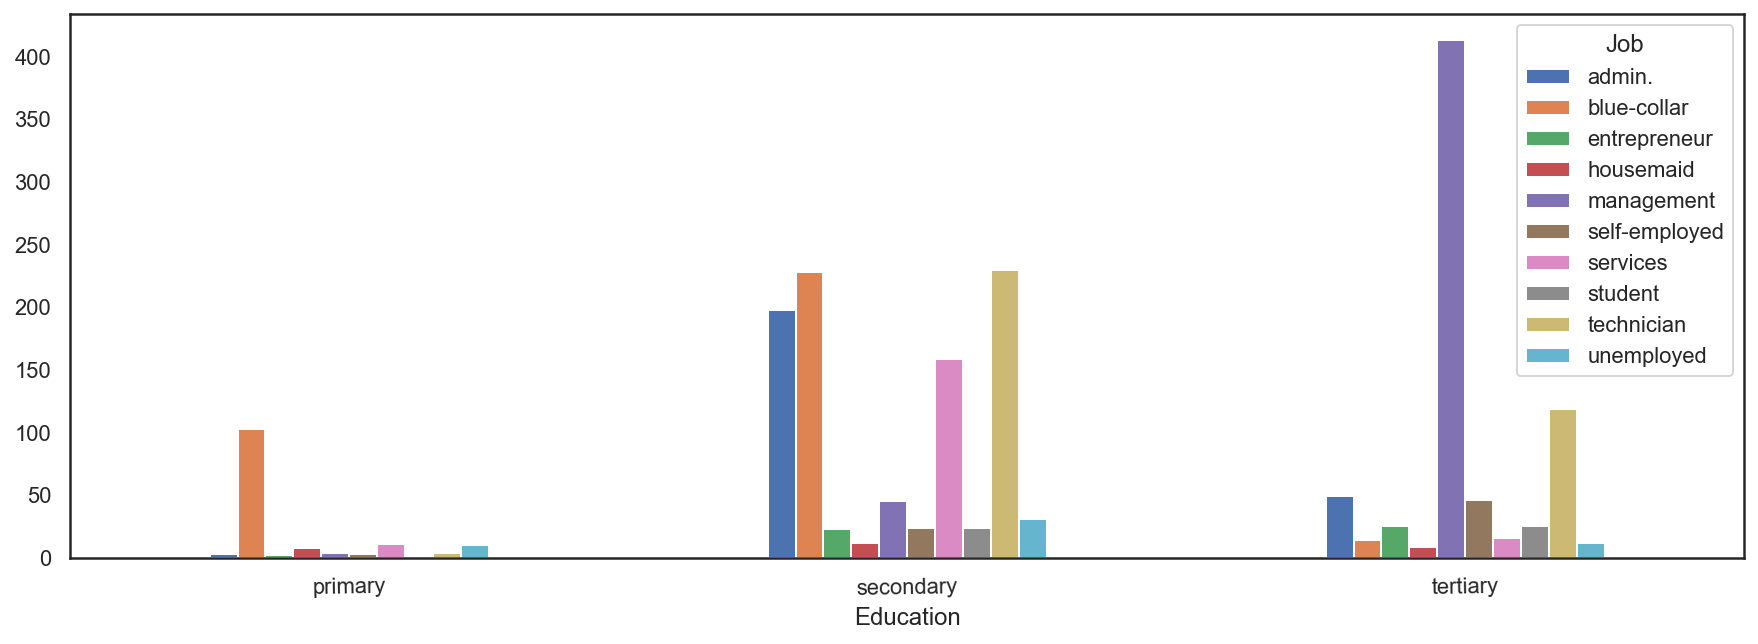

In [164]:
with sns.axes_style('white'):
    pd.crosstab(Miss_Handle_Mid_df.Education, Miss_Handle_Mid_df.Job).plot(kind = 'bar' , rot =1, figsize=(15,5))

In [165]:
 pd.crosstab(Miss_Handle_Mid_df.Education, Miss_Handle_Mid_df.Job)

Job,admin.,blue-collar,entrepreneur,housemaid,management,self-employed,services,student,technician,unemployed
Education,,,,,,,,,,
primary,3,103,2,8,4,3,11,0,4,10
secondary,198,228,23,12,45,24,159,24,230,31
tertiary,49,14,25,9,413,46,16,25,119,12


In [166]:
# secondary의 경우 결측치를 랜덤하게 blue-collar 또는 technician 으로 할당

In [167]:
# 베르누이 분포를 사용하여 랜덤하게 할당해보자
mu = 0.5
rv = stats.bernoulli(mu)

In [168]:
x = rv.rvs(len(Miss_Handle_Mid_df[Miss_Handle_Mid_df['Job'].isna()]), random_state=2021)

In [169]:
x_ls = ["blue-collar" if x%2==0 else "technician" for x in x]

In [170]:
x_ls

['technician',
 'technician',
 'blue-collar',
 'blue-collar',
 'technician',
 'blue-collar']

In [171]:
# 결측치
# 2. Job 해결
Job_ls = Miss_Handle_Mid_df[Miss_Handle_Mid_df['Job'].isna()].index

In [172]:
Miss_Handle_df.loc[Job_ls, 'Job'] = x_ls

In [173]:
# 재할당 - 결측치가 해결되어서 다시 수정
Miss_Handle_Mid_df = Miss_Handle_df[(Miss_Handle_df.Age >= 26) & (Miss_Handle_df.Age < 40)]

In [174]:
# Job에 대한 결측치 제거
Miss_Handle_Mid_df.isna().sum()

Age                   0
Job                   0
Marital               0
Education            45
Default               0
Balance               0
HHInsurance           0
CarLoan               0
Communication       426
LastContactDay        0
LastContactMonth      0
NoOfContacts          0
DaysPassed            0
PrevAttempts          0
Outcome               0
Call_StartHour        0
Call_Duration         0
dtype: int64

In [175]:
list(np.unique(Miss_Handle_Mid_df[Miss_Handle_Mid_df['Education'].isna()].Job))

['admin.',
 'blue-collar',
 'housemaid',
 'management',
 'services',
 'student',
 'technician']

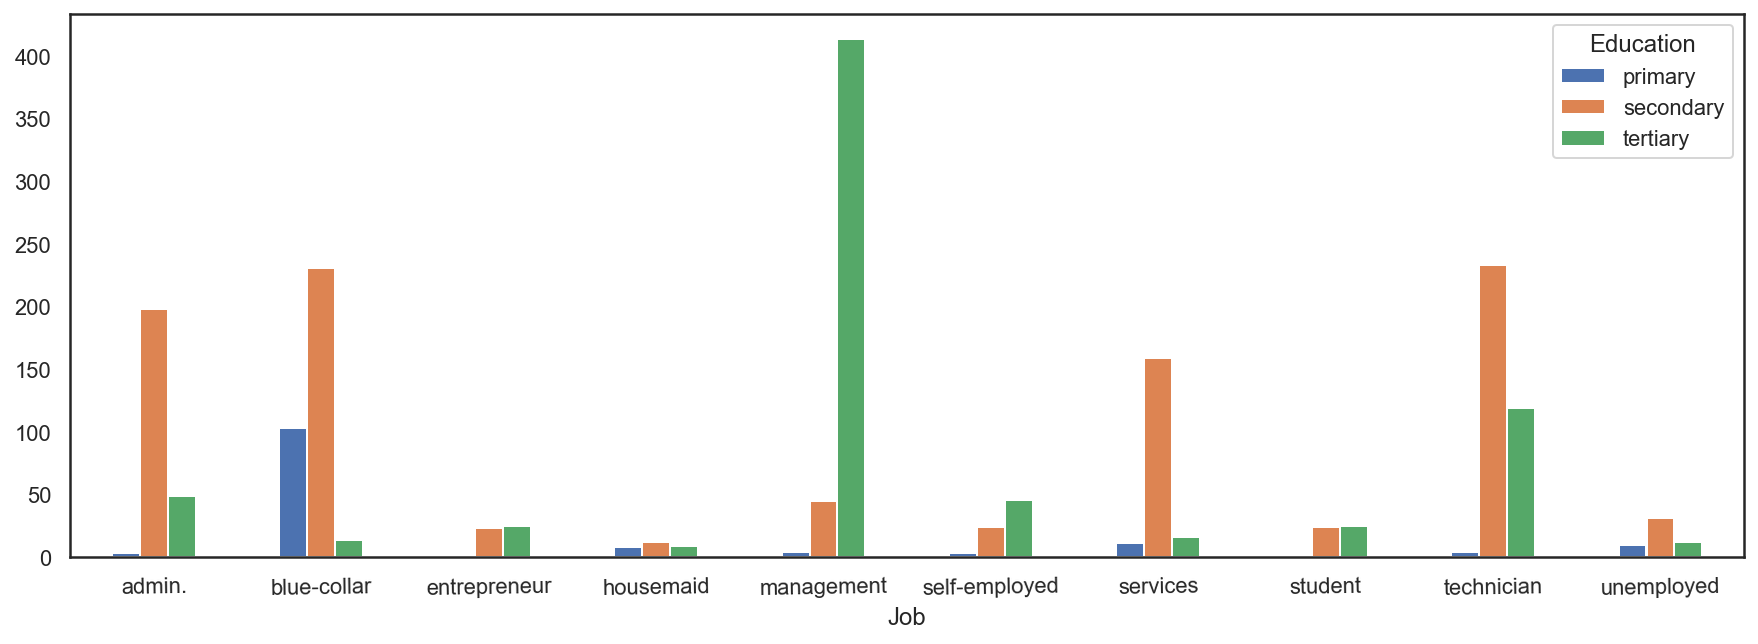

In [176]:
with sns.axes_style('white'):
    pd.crosstab(Miss_Handle_Mid_df.Job, Miss_Handle_Mid_df.Education).plot(kind = 'bar' , rot =1, figsize=(15,5))

In [177]:
pd.crosstab(Miss_Handle_Mid_df.Job, Miss_Handle_Mid_df.Education)

Education,primary,secondary,tertiary
Job,,,
admin.,3,198,49
blue-collar,103,231,14
entrepreneur,2,23,25
housemaid,8,12,9
management,4,45,413
self-employed,3,24,46
services,11,159,16
student,0,24,25
technician,4,233,119


In [178]:
# 1. admin.
admin_ls = Miss_Handle_Mid_df[(Miss_Handle_Mid_df['Education'].isna()) & (Miss_Handle_Mid_df['Job'] == 'admin.')].index

In [179]:
Miss_Handle_Mid_df.loc[admin_ls]

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,Call_StartHour,Call_Duration
799,37,admin.,married,NaN,0,497,1,0,telephone,19,nov,2,-1,0,NonePrev,9,2.966667
2515,28,admin.,single,NaN,0,24,1,0,cellular,18,jul,2,-1,0,NonePrev,14,6.916667
2939,36,admin.,married,NaN,0,991,0,0,cellular,14,jan,2,-1,0,NonePrev,17,9.816667
3723,37,admin.,married,NaN,0,892,1,0,cellular,30,jul,17,-1,0,NonePrev,17,4.483333


In [180]:
Miss_Handle_df.loc[admin_ls, 'Education'] = 'secondary'

In [181]:
Miss_Handle_df.loc[admin_ls]

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,Call_StartHour,Call_Duration
799,37,admin.,married,secondary,0,497,1,0,telephone,19,nov,2,-1,0,NonePrev,9,2.966667
2515,28,admin.,single,secondary,0,24,1,0,cellular,18,jul,2,-1,0,NonePrev,14,6.916667
2939,36,admin.,married,secondary,0,991,0,0,cellular,14,jan,2,-1,0,NonePrev,17,9.816667
3723,37,admin.,married,secondary,0,892,1,0,cellular,30,jul,17,-1,0,NonePrev,17,4.483333


In [182]:
# 2. blue-collar

In [183]:
blue_ls = Miss_Handle_Mid_df[(Miss_Handle_Mid_df['Education'].isna()) & (Miss_Handle_Mid_df['Job'] == 'blue-collar')].index

In [184]:
Miss_Handle_Mid_df.loc[blue_ls]
Miss_Handle_df.loc[blue_ls, 'Education'] = 'secondary'

In [185]:
# 3. housemaid

In [186]:
house_ls = Miss_Handle_Mid_df[(Miss_Handle_Mid_df['Education'].isna()) & (Miss_Handle_Mid_df['Job'] == 'housemaid')].index

In [187]:
Miss_Handle_Mid_df.loc[house_ls]

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,Call_StartHour,Call_Duration
2171,31,housemaid,married,NaN,1,-6,0,1,telephone,7,jul,2,-1,0,NonePrev,11,1.566667


In [188]:
Miss_Handle_df.loc[house_ls, 'Education'] = 'secondary'

In [189]:
Miss_Handle_Mid_df.loc[house_ls]

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,Call_StartHour,Call_Duration
2171,31,housemaid,married,NaN,1,-6,0,1,telephone,7,jul,2,-1,0,NonePrev,11,1.566667


In [190]:
# 4. management

In [191]:
management_ls = Miss_Handle_Mid_df[(Miss_Handle_Mid_df['Education'].isna()) & (Miss_Handle_Mid_df['Job'] == 'management')].index

In [192]:
Miss_Handle_df.loc[management_ls, 'Education'] = 'tertiary'

In [193]:
Miss_Handle_df.loc[management_ls]

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,Call_StartHour,Call_Duration
58,34,management,single,tertiary,0,6013,1,0,cellular,18,may,1,-1,0,NonePrev,13,10.20
562,29,management,single,tertiary,0,560,0,0,cellular,5,apr,1,307,1,failure,17,7.65
575,37,management,married,tertiary,0,247,0,0,cellular,9,jul,1,-1,0,NonePrev,11,6.10
1403,34,management,single,tertiary,0,1534,1,0,cellular,16,apr,1,147,7,other,17,2.60


In [194]:
# 5. services
services_ls = Miss_Handle_Mid_df[(Miss_Handle_Mid_df['Education'].isna()) & (Miss_Handle_Mid_df['Job'] == 'services')].index

In [195]:
Miss_Handle_df.loc[services_ls, 'Education'] = 'secondary'

In [196]:
Miss_Handle_df.loc[services_ls]

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,Call_StartHour,Call_Duration
1535,35,services,married,secondary,0,618,0,0,cellular,30,apr,1,-1,0,NonePrev,13,15.850000
1821,36,services,single,secondary,0,281,1,0,NaN,16,may,1,-1,0,NonePrev,13,8.583333
3448,38,services,divorced,secondary,0,6360,0,0,NaN,20,jun,2,-1,0,NonePrev,15,23.483333


In [197]:
# 6. student
student_ls = Miss_Handle_Mid_df[(Miss_Handle_Mid_df['Education'].isna()) & (Miss_Handle_Mid_df['Job'] == 'student')].index

In [198]:
# 학생의 경우 secondary의 비율이 25세 미만 월등히 높으므로 선택
Miss_Handle_df.loc[student_ls, 'Education'] = 'secondary'

In [199]:
# 7. technician
technician_ls = Miss_Handle_Mid_df[(Miss_Handle_Mid_df['Education'].isna()) & (Miss_Handle_Mid_df['Job'] == 'technician')].index

In [200]:
Miss_Handle_df.loc[technician_ls, 'Education'] = 'secondary'

In [201]:
# 결측치 재할당
Miss_Handle_Mid_df = Miss_Handle_df[(Miss_Handle_df.Age >= 26) & (Miss_Handle_df.Age < 40)]

In [202]:
# 모든 결측치 제거
Miss_Handle_Mid_df.isna().sum()

Age                   0
Job                   0
Marital               0
Education             0
Default               0
Balance               0
HHInsurance           0
CarLoan               0
Communication       426
LastContactDay        0
LastContactMonth      0
NoOfContacts          0
DaysPassed            0
PrevAttempts          0
Outcome               0
Call_StartHour        0
Call_Duration         0
dtype: int64

In [203]:
### 혹시나 있을 타이핑 애러를 확인하기 위함 ###

In [204]:
list(np.unique(Miss_Handle_Mid_df.Job))

['admin.',
 'blue-collar',
 'entrepreneur',
 'housemaid',
 'management',
 'self-employed',
 'services',
 'student',
 'technician',
 'unemployed']

In [205]:
list(np.unique(Miss_Handle_Mid_df.Education))

['primary', 'secondary', 'tertiary']

In [206]:
##### 현재 25세 이상 ~ 40 미만 까지 Job, Education에 해당하는 결측치를 제거하였습니다.

### Missing : Job & Education - Between Age 40 and Age 60 under

In [207]:
# 40 이상 60 미만 

In [208]:
Miss_Handle_Old_df = Miss_Handle_df[(Miss_Handle_df.Age >= 40) & (Miss_Handle_df.Age < 60)]

In [209]:
Miss_Handle_Old_df.isna().sum()

Age                   0
Job                  12
Marital               0
Education            74
Default               0
Balance               0
HHInsurance           0
CarLoan               0
Communication       435
LastContactDay        0
LastContactMonth      0
NoOfContacts          0
DaysPassed            0
PrevAttempts          0
Outcome               0
Call_StartHour        0
Call_Duration         0
dtype: int64

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


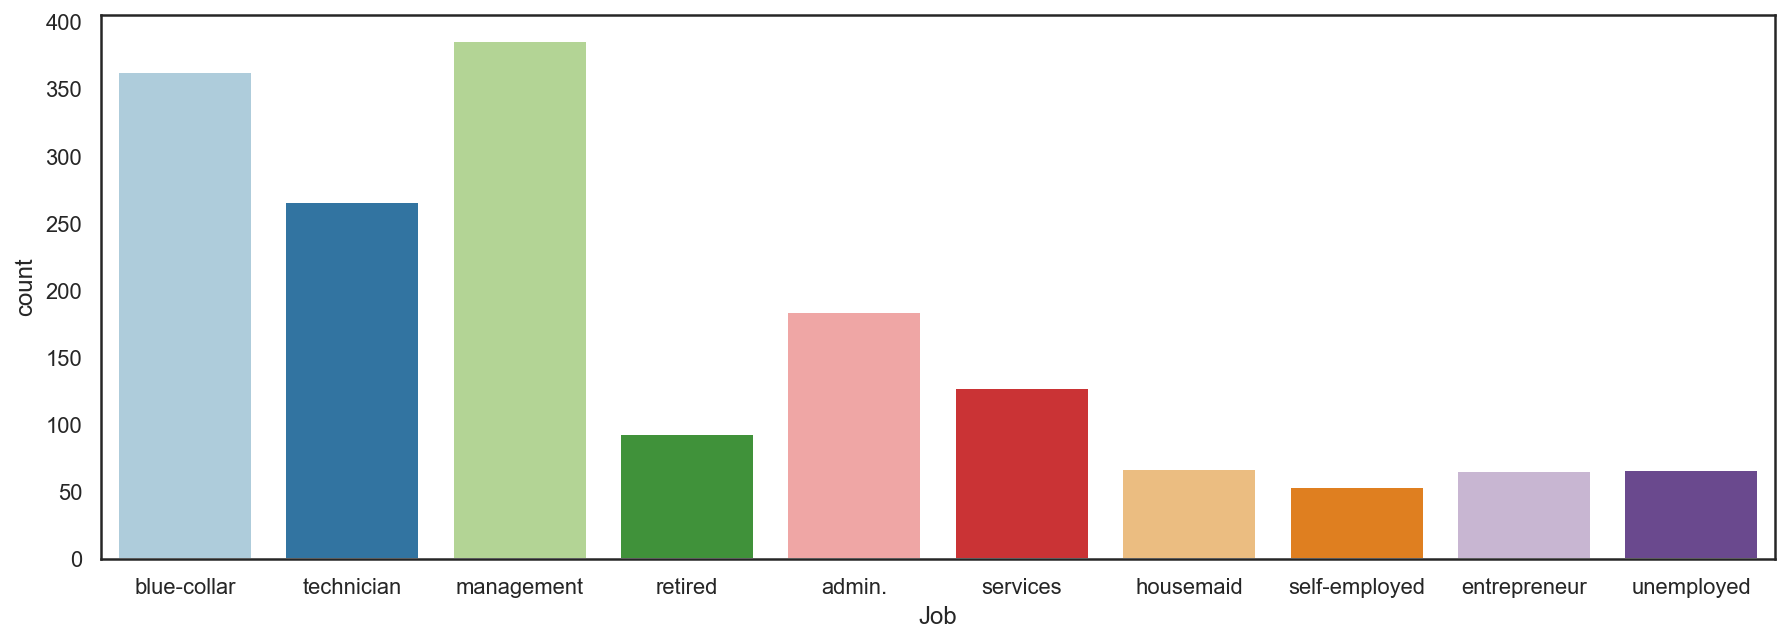

In [210]:
with sns.axes_style('white'):
    plt.figure(figsize=(15,5))
    sns.countplot(Miss_Handle_Old_df.Job, palette = 'Paired')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


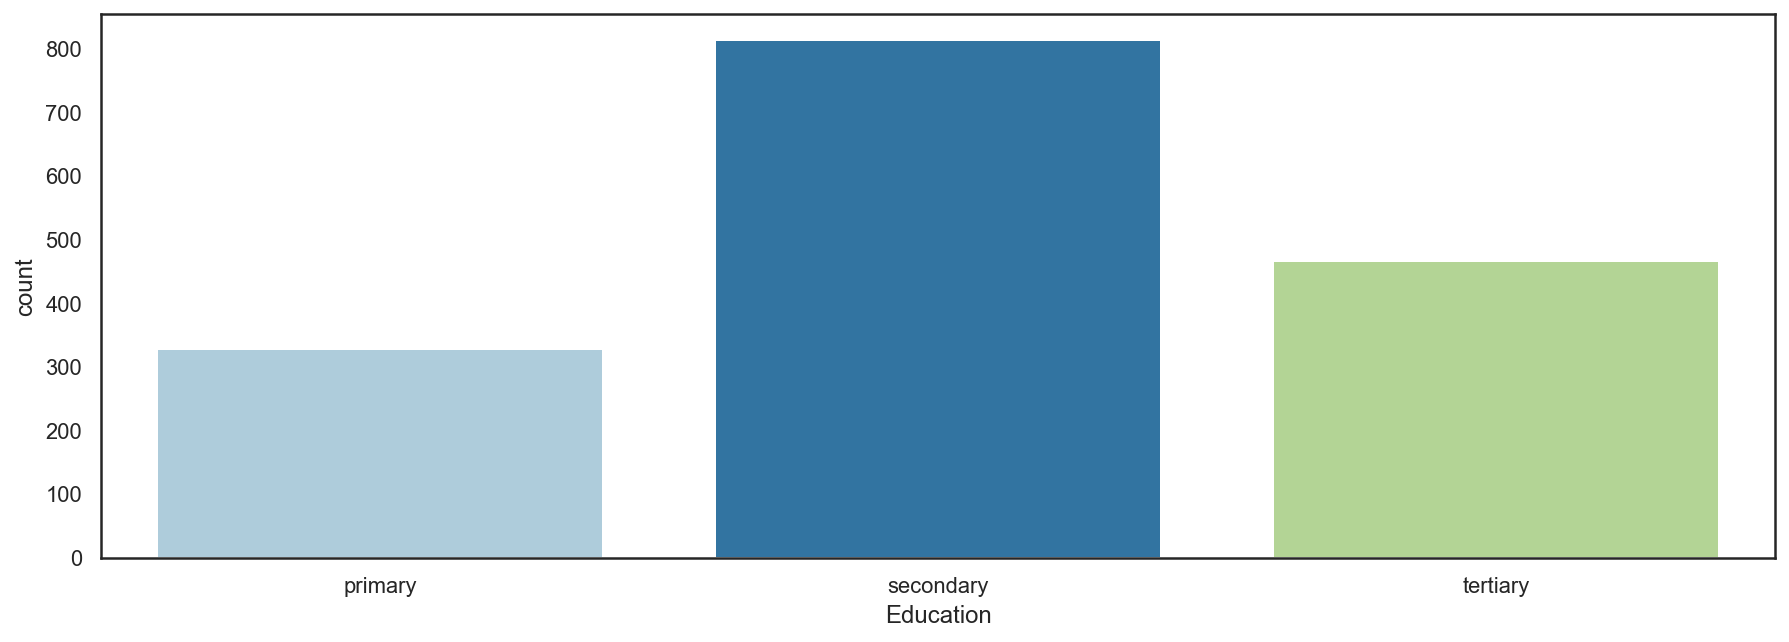

In [211]:
with sns.axes_style('white'):
    plt.figure(figsize=(15,5))
    sns.countplot(Miss_Handle_Old_df.Education, palette = 'Paired')

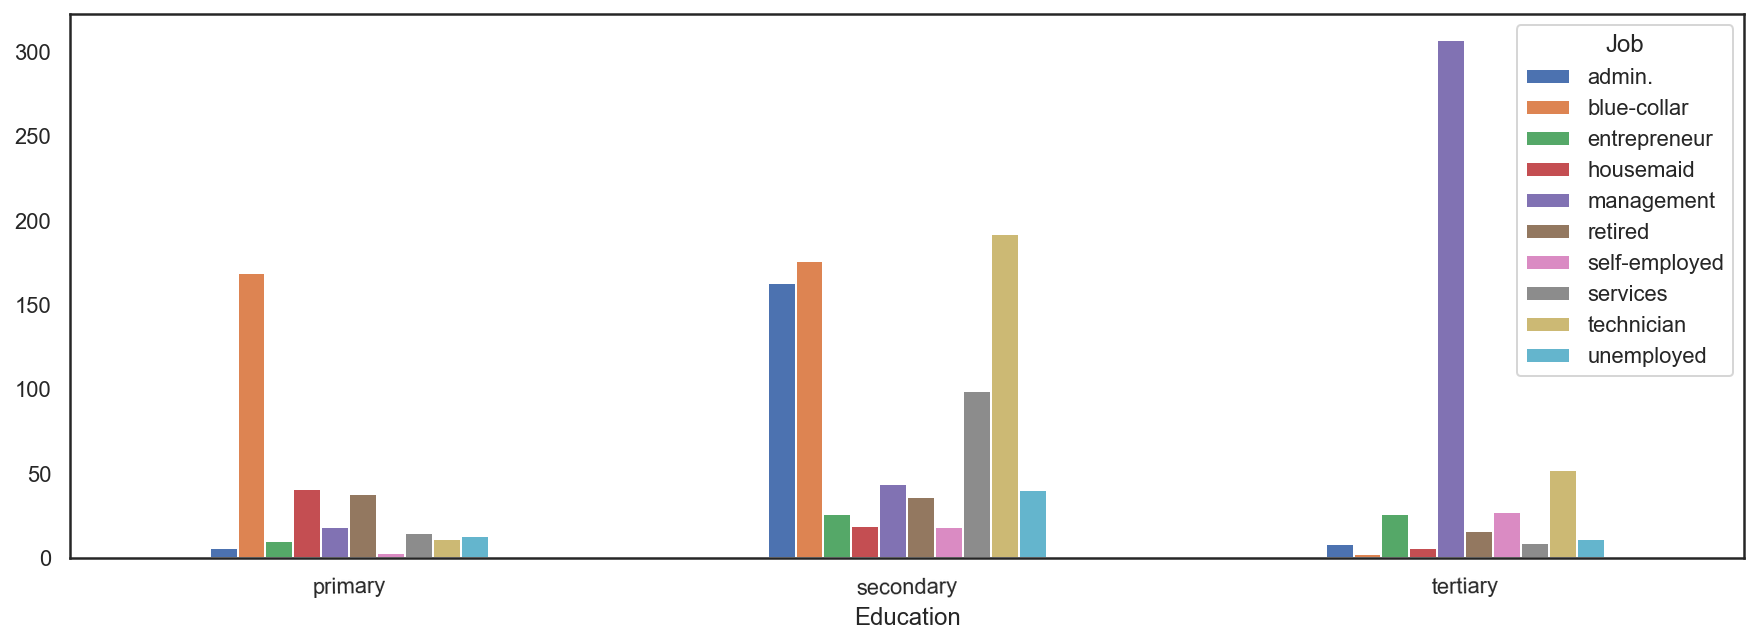

In [212]:
with sns.axes_style('white'):
    pd.crosstab(Miss_Handle_Old_df.Education, Miss_Handle_Old_df.Job).plot(kind = 'bar' , rot =1, figsize=(15,5))

In [213]:
pd.crosstab(Miss_Handle_Old_df.Education, Miss_Handle_Old_df.Job)

Job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,technician,unemployed
Education,,,,,,,,,,
primary,6,169,10,41,18,38,3,15,11,13
secondary,163,176,26,19,44,36,18,99,192,40
tertiary,8,2,26,6,307,16,27,9,52,11


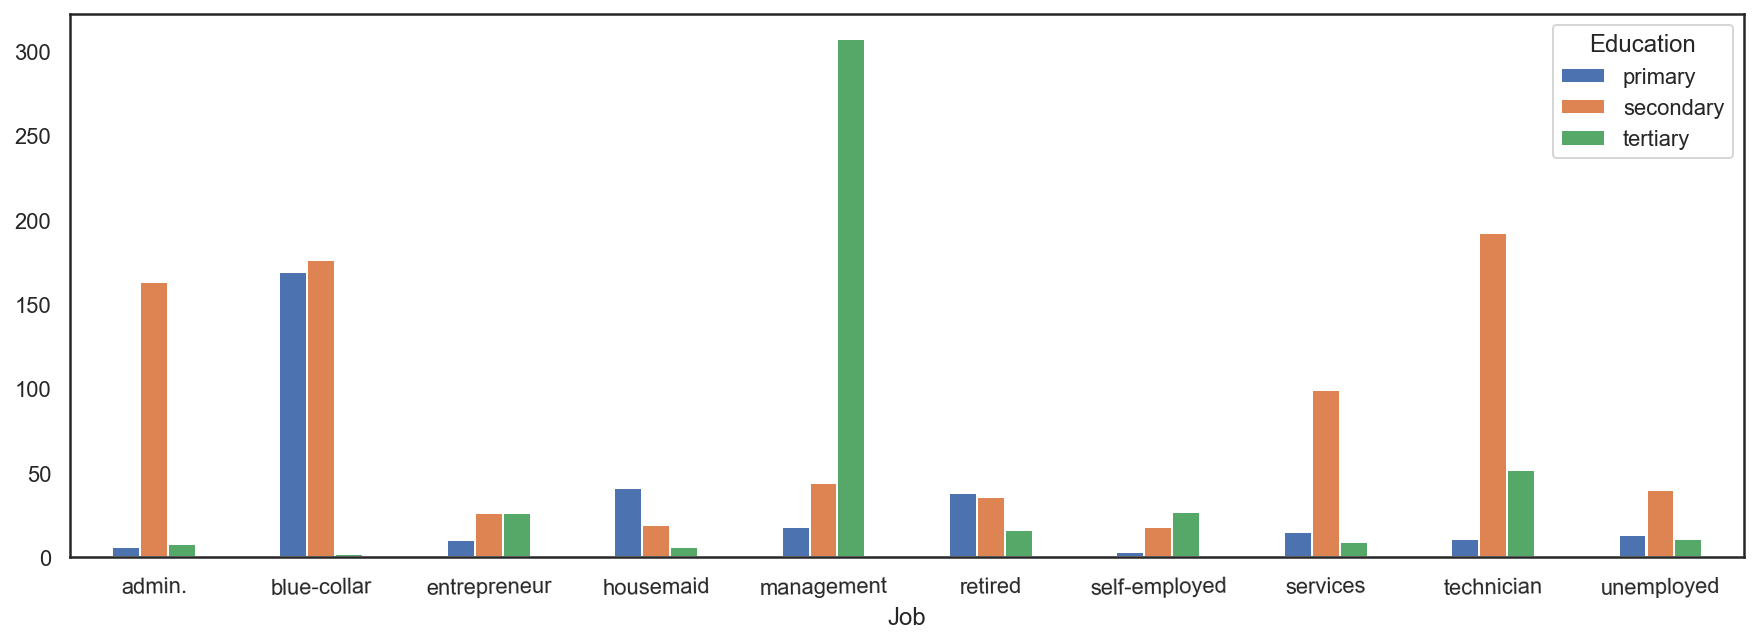

In [214]:
with sns.axes_style('white'):
    pd.crosstab(Miss_Handle_Old_df.Job, Miss_Handle_Old_df.Education).plot(kind = 'bar' , rot =1, figsize=(15,5))

In [215]:
pd.crosstab(Miss_Handle_Old_df.Job, Miss_Handle_Old_df.Education)

Education,primary,secondary,tertiary
Job,,,
admin.,6,163,8
blue-collar,169,176,2
entrepreneur,10,26,26
housemaid,41,19,6
management,18,44,307
retired,38,36,16
self-employed,3,18,27
services,15,99,9
technician,11,192,52


In [216]:
## 1. Job & Education 모두 결측치가 있는 경우
## 다양성을 위해 Education을 secondary로 대체
Miss_Handle_Old_df[(Miss_Handle_Old_df.Job.isna()) & (Miss_Handle_Old_df.Education.isna())]

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,Call_StartHour,Call_Duration
27,45,NaN,divorced,NaN,0,0,0,0,cellular,21,apr,3,-1,0,NonePrev,12,4.633333
239,41,NaN,single,NaN,0,942,0,0,cellular,27,oct,1,188,1,success,16,2.383333
1147,50,NaN,married,NaN,0,558,0,0,cellular,9,jul,1,683,6,failure,9,7.733333
2032,44,NaN,married,NaN,0,722,1,0,telephone,22,jul,2,-1,0,NonePrev,14,4.483333
2685,50,NaN,married,NaN,0,1533,0,0,cellular,4,aug,1,-1,0,NonePrev,14,2.616667


In [217]:
all_idx = Miss_Handle_Old_df[(Miss_Handle_Old_df.Job.isna()) & (Miss_Handle_Old_df.Education.isna())].index

Miss_Handle_df.loc[all_idx, 'Education'] = 'secondary'

In [218]:
Miss_Handle_df.loc[all_idx]

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,Call_StartHour,Call_Duration
27,45,NaN,divorced,secondary,0,0,0,0,cellular,21,apr,3,-1,0,NonePrev,12,4.633333
239,41,NaN,single,secondary,0,942,0,0,cellular,27,oct,1,188,1,success,16,2.383333
1147,50,NaN,married,secondary,0,558,0,0,cellular,9,jul,1,683,6,failure,9,7.733333
2032,44,NaN,married,secondary,0,722,1,0,telephone,22,jul,2,-1,0,NonePrev,14,4.483333
2685,50,NaN,married,secondary,0,1533,0,0,cellular,4,aug,1,-1,0,NonePrev,14,2.616667


In [219]:
# 재할당 - 결측치가 해결되어서 다시 수정
Miss_Handle_Old_df = Miss_Handle_df[(Miss_Handle_df.Age >= 40) & (Miss_Handle_df.Age < 60)]

In [220]:
Miss_Handle_Old_df.isna().sum()

Age                   0
Job                  12
Marital               0
Education            69
Default               0
Balance               0
HHInsurance           0
CarLoan               0
Communication       435
LastContactDay        0
LastContactMonth      0
NoOfContacts          0
DaysPassed            0
PrevAttempts          0
Outcome               0
Call_StartHour        0
Call_Duration         0
dtype: int64

In [221]:
# 2. Job에서 결측치가 있는 경우

In [222]:
list(np.unique(Miss_Handle_Old_df[Miss_Handle_Old_df['Job'].isna()].Education))

['primary', 'secondary', 'tertiary']

In [223]:
Miss_Handle_Old_df[Miss_Handle_Old_df['Job'].isna()]

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,Call_StartHour,Call_Duration
27,45,NaN,divorced,secondary,0,0,0,0,cellular,21,apr,3,-1,0,NonePrev,12,4.633333
239,41,NaN,single,secondary,0,942,0,0,cellular,27,oct,1,188,1,success,16,2.383333
486,54,NaN,married,primary,0,981,0,0,cellular,22,aug,12,-1,0,NonePrev,11,10.850000
605,53,NaN,married,primary,0,732,0,0,cellular,27,oct,2,-1,0,NonePrev,9,12.650000
1130,55,NaN,married,tertiary,0,0,0,0,NaN,5,jun,1,-1,0,NonePrev,14,0.633333
1147,50,NaN,married,secondary,0,558,0,0,cellular,9,jul,1,683,6,failure,9,7.733333
1978,49,NaN,single,tertiary,0,2226,0,0,NaN,17,jun,3,-1,0,NonePrev,17,2.300000
2032,44,NaN,married,secondary,0,722,1,0,telephone,22,jul,2,-1,0,NonePrev,14,4.483333
2168,55,NaN,married,secondary,0,2206,0,0,cellular,12,aug,1,91,5,success,13,4.416667
2655,46,NaN,single,primary,0,10,0,0,NaN,18,jun,6,-1,0,NonePrev,17,1.066667


In [224]:
# 2-1. Education에서 primary의 경우는 blue-collar로 대체

In [225]:
primary_idx = Miss_Handle_Old_df[(Miss_Handle_Old_df['Job'].isna()) & (Miss_Handle_Old_df['Education'] == 'primary')].index

In [226]:
Miss_Handle_df.loc[primary_idx]

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,Call_StartHour,Call_Duration
486,54,NaN,married,primary,0,981,0,0,cellular,22,aug,12,-1,0,NonePrev,11,10.850000
605,53,NaN,married,primary,0,732,0,0,cellular,27,oct,2,-1,0,NonePrev,9,12.650000
2655,46,NaN,single,primary,0,10,0,0,NaN,18,jun,6,-1,0,NonePrev,17,1.066667
3490,43,NaN,married,primary,0,2113,0,0,cellular,29,jul,2,-1,0,NonePrev,12,0.550000


In [227]:
Miss_Handle_df.loc[primary_idx, 'Job'] = 'blue-collar'

In [228]:
Miss_Handle_df.loc[primary_idx]

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,Call_StartHour,Call_Duration
486,54,blue-collar,married,primary,0,981,0,0,cellular,22,aug,12,-1,0,NonePrev,11,10.850000
605,53,blue-collar,married,primary,0,732,0,0,cellular,27,oct,2,-1,0,NonePrev,9,12.650000
2655,46,blue-collar,single,primary,0,10,0,0,NaN,18,jun,6,-1,0,NonePrev,17,1.066667
3490,43,blue-collar,married,primary,0,2113,0,0,cellular,29,jul,2,-1,0,NonePrev,12,0.550000


In [229]:
# 2-2 Education에서 secondary의 경우는 technician로 대체

In [230]:
secondary_idx = Miss_Handle_Old_df[(Miss_Handle_Old_df['Job'].isna()) & (Miss_Handle_Old_df['Education'] == 'secondary')].index

In [231]:
Miss_Handle_df.loc[secondary_idx]

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,Call_StartHour,Call_Duration
27,45,NaN,divorced,secondary,0,0,0,0,cellular,21,apr,3,-1,0,NonePrev,12,4.633333
239,41,NaN,single,secondary,0,942,0,0,cellular,27,oct,1,188,1,success,16,2.383333
1147,50,NaN,married,secondary,0,558,0,0,cellular,9,jul,1,683,6,failure,9,7.733333
2032,44,NaN,married,secondary,0,722,1,0,telephone,22,jul,2,-1,0,NonePrev,14,4.483333
2168,55,NaN,married,secondary,0,2206,0,0,cellular,12,aug,1,91,5,success,13,4.416667
2685,50,NaN,married,secondary,0,1533,0,0,cellular,4,aug,1,-1,0,NonePrev,14,2.616667


In [232]:
Miss_Handle_df.loc[secondary_idx, 'Job'] = 'technician'

In [233]:
Miss_Handle_df.loc[secondary_idx]

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,Call_StartHour,Call_Duration
27,45,technician,divorced,secondary,0,0,0,0,cellular,21,apr,3,-1,0,NonePrev,12,4.633333
239,41,technician,single,secondary,0,942,0,0,cellular,27,oct,1,188,1,success,16,2.383333
1147,50,technician,married,secondary,0,558,0,0,cellular,9,jul,1,683,6,failure,9,7.733333
2032,44,technician,married,secondary,0,722,1,0,telephone,22,jul,2,-1,0,NonePrev,14,4.483333
2168,55,technician,married,secondary,0,2206,0,0,cellular,12,aug,1,91,5,success,13,4.416667
2685,50,technician,married,secondary,0,1533,0,0,cellular,4,aug,1,-1,0,NonePrev,14,2.616667


In [234]:
# 2-3 Education에서 tertiary의 경우는 management로 대체

In [235]:
tertiary_idx = Miss_Handle_Old_df[(Miss_Handle_Old_df['Job'].isna()) & (Miss_Handle_Old_df['Education'] == 'tertiary')].index

In [236]:
Miss_Handle_df.loc[tertiary_idx]

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,Call_StartHour,Call_Duration
1130,55,NaN,married,tertiary,0,0,0,0,NaN,5,jun,1,-1,0,NonePrev,14,0.633333
1978,49,NaN,single,tertiary,0,2226,0,0,NaN,17,jun,3,-1,0,NonePrev,17,2.300000


In [237]:
Miss_Handle_df.loc[tertiary_idx, 'Job'] = 'management'

In [238]:
Miss_Handle_df.loc[tertiary_idx]

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,Call_StartHour,Call_Duration
1130,55,management,married,tertiary,0,0,0,0,NaN,5,jun,1,-1,0,NonePrev,14,0.633333
1978,49,management,single,tertiary,0,2226,0,0,NaN,17,jun,3,-1,0,NonePrev,17,2.300000


In [239]:
# 재할당 - 결측치가 해결되어서 다시 수정
Miss_Handle_Old_df = Miss_Handle_df[(Miss_Handle_df.Age >= 40) & (Miss_Handle_df.Age < 60)]

In [240]:
Miss_Handle_Old_df.isna().sum()

Age                   0
Job                   0
Marital               0
Education            69
Default               0
Balance               0
HHInsurance           0
CarLoan               0
Communication       435
LastContactDay        0
LastContactMonth      0
NoOfContacts          0
DaysPassed            0
PrevAttempts          0
Outcome               0
Call_StartHour        0
Call_Duration         0
dtype: int64

In [241]:
list(np.unique(Miss_Handle_Old_df[Miss_Handle_Old_df['Education'].isna()].Job))

['admin.',
 'blue-collar',
 'entrepreneur',
 'housemaid',
 'management',
 'retired',
 'self-employed',
 'services',
 'technician',
 'unemployed']

In [242]:
# 3-1. Education에서 admin.의 경우는 secondary로 대체

In [243]:
# 1. admin. 의 경우는 secondary로 대체
admin_ls = Miss_Handle_Old_df[(Miss_Handle_Old_df['Education'].isna()) & (Miss_Handle_Old_df['Job'] == 'admin.')].index

In [244]:
Miss_Handle_df.loc[admin_ls]

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,Call_StartHour,Call_Duration
671,50,admin.,divorced,NaN,0,4204,0,0,NaN,19,jun,2,-1,0,NonePrev,17,5.583333
1358,45,admin.,married,NaN,0,5511,0,0,cellular,2,jul,1,-1,0,NonePrev,11,4.533333
2342,48,admin.,married,NaN,0,0,1,0,cellular,8,may,1,168,2,failure,12,1.416667
2430,53,admin.,divorced,NaN,0,257,0,0,cellular,11,jul,2,-1,0,NonePrev,12,21.833333
3645,57,admin.,married,NaN,0,1401,0,0,cellular,21,aug,22,-1,0,NonePrev,16,1.516667
3655,42,admin.,single,NaN,0,297,1,0,NaN,29,may,1,-1,0,NonePrev,15,1.766667
3666,45,admin.,married,NaN,0,1577,0,0,NaN,20,jun,4,-1,0,NonePrev,10,0.266667


In [245]:
Miss_Handle_df.loc[admin_ls, 'Education'] = 'secondary'

In [246]:
Miss_Handle_df.loc[admin_ls]

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,Call_StartHour,Call_Duration
671,50,admin.,divorced,secondary,0,4204,0,0,NaN,19,jun,2,-1,0,NonePrev,17,5.583333
1358,45,admin.,married,secondary,0,5511,0,0,cellular,2,jul,1,-1,0,NonePrev,11,4.533333
2342,48,admin.,married,secondary,0,0,1,0,cellular,8,may,1,168,2,failure,12,1.416667
2430,53,admin.,divorced,secondary,0,257,0,0,cellular,11,jul,2,-1,0,NonePrev,12,21.833333
3645,57,admin.,married,secondary,0,1401,0,0,cellular,21,aug,22,-1,0,NonePrev,16,1.516667
3655,42,admin.,single,secondary,0,297,1,0,NaN,29,may,1,-1,0,NonePrev,15,1.766667
3666,45,admin.,married,secondary,0,1577,0,0,NaN,20,jun,4,-1,0,NonePrev,10,0.266667


In [247]:
# 3-2. Education에서 blue-collar의 경우는 secondary로 대체

In [248]:
blue_ls = Miss_Handle_Old_df[(Miss_Handle_Old_df['Education'].isna()) & (Miss_Handle_Old_df['Job'] == 'blue-collar')].index

In [249]:
Miss_Handle_df.loc[blue_ls, 'Education'] = 'secondary'

In [250]:
Miss_Handle_df.loc[blue_ls]

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,Call_StartHour,Call_Duration
246,44,blue-collar,married,secondary,0,1529,1,0,cellular,30,apr,1,-1,0,NonePrev,17,5.783333
700,44,blue-collar,single,secondary,0,2167,1,0,NaN,7,may,1,-1,0,NonePrev,9,21.216667
1047,41,blue-collar,married,secondary,0,665,1,0,NaN,19,may,3,-1,0,NonePrev,9,2.366667
1482,44,blue-collar,married,secondary,0,189,1,0,NaN,26,may,3,-1,0,NonePrev,9,2.916667
1655,50,blue-collar,married,secondary,0,2284,1,0,telephone,31,jul,17,-1,0,NonePrev,13,18.133333
1782,57,blue-collar,married,secondary,0,3585,0,0,telephone,14,nov,1,-1,0,NonePrev,9,2.866667
1833,46,blue-collar,married,secondary,0,209,0,0,cellular,11,aug,2,-1,0,NonePrev,14,1.200000
2275,44,blue-collar,married,secondary,0,391,0,0,NaN,6,jun,4,-1,0,NonePrev,12,5.916667
2391,45,blue-collar,married,secondary,0,458,1,1,cellular,11,jul,2,-1,0,NonePrev,9,2.416667
2603,44,blue-collar,single,secondary,0,4330,0,0,NaN,18,jun,9,-1,0,NonePrev,13,0.266667


In [251]:
# 3-3 Education에서 entrepreneur의 경우는 secondary 또는 tertiary로 대체
# 이전 자료에서 상대적으로 tertiary이 더 높으므로 tertiary로 대체

In [252]:
entrepreneur_ls = Miss_Handle_Old_df[(Miss_Handle_Old_df['Education'].isna()) & (Miss_Handle_Old_df['Job'] == 'entrepreneur')].index

In [253]:
Miss_Handle_df.loc[entrepreneur_ls]

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,Call_StartHour,Call_Duration
1390,57,entrepreneur,married,NaN,0,975,1,1,cellular,22,jul,4,-1,0,NonePrev,17,3.933333
2627,53,entrepreneur,married,NaN,0,28,0,0,cellular,31,jul,2,-1,0,NonePrev,15,1.950000
3944,45,entrepreneur,married,NaN,0,3133,1,1,cellular,10,jul,1,-1,0,NonePrev,16,13.400000


In [254]:
Miss_Handle_df.loc[entrepreneur_ls, 'Education'] = 'tertiary'

In [255]:
Miss_Handle_df.loc[entrepreneur_ls]

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,Call_StartHour,Call_Duration
1390,57,entrepreneur,married,tertiary,0,975,1,1,cellular,22,jul,4,-1,0,NonePrev,17,3.933333
2627,53,entrepreneur,married,tertiary,0,28,0,0,cellular,31,jul,2,-1,0,NonePrev,15,1.950000
3944,45,entrepreneur,married,tertiary,0,3133,1,1,cellular,10,jul,1,-1,0,NonePrev,16,13.400000


In [256]:
# 3-4 Education에서 housemaid는 primary로 대체

In [257]:
housemaid_ls = Miss_Handle_Old_df[(Miss_Handle_Old_df['Education'].isna()) & (Miss_Handle_Old_df['Job'] == 'housemaid')].index

In [258]:
Miss_Handle_df.loc[housemaid_ls, 'Education'] = 'primary'

In [259]:
Miss_Handle_df.loc[housemaid_ls]

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,Call_StartHour,Call_Duration
917,56,housemaid,married,primary,0,1780,0,0,cellular,11,aug,2,-1,0,NonePrev,16,1.85


In [260]:
# 3-5 Education에서 management는 tertiary로 대체

In [261]:
management_ls = Miss_Handle_Old_df[(Miss_Handle_Old_df['Education'].isna()) & (Miss_Handle_Old_df['Job'] == 'management')].index

In [262]:
Miss_Handle_df.loc[management_ls]

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,Call_StartHour,Call_Duration
131,44,management,married,NaN,0,2724,0,0,cellular,28,dec,1,-1,0,NonePrev,14,14.883333
150,57,management,divorced,NaN,0,854,0,0,cellular,27,aug,4,92,1,failure,10,11.666667
335,53,management,married,NaN,0,2240,1,0,cellular,2,jun,2,385,1,success,14,4.700000
454,42,management,married,NaN,0,1519,0,0,cellular,19,jul,1,-1,0,NonePrev,14,4.466667
913,55,management,married,NaN,0,1504,1,0,cellular,22,may,2,-1,0,NonePrev,16,5.633333
1230,42,management,married,NaN,0,849,1,0,cellular,8,oct,1,321,1,other,13,11.116667
1302,44,management,married,NaN,0,282,0,0,cellular,9,mar,2,154,3,success,13,11.666667
1687,48,management,married,NaN,0,54,1,0,NaN,16,may,7,-1,0,NonePrev,10,4.883333
2511,47,management,married,NaN,0,4189,1,0,cellular,19,nov,3,-1,0,NonePrev,12,8.150000
2671,44,management,married,NaN,0,282,0,0,cellular,6,oct,3,-1,0,NonePrev,10,4.933333


In [263]:
Miss_Handle_df.loc[management_ls, 'Education'] = 'tertiary'

In [264]:
Miss_Handle_df.loc[management_ls]

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,Call_StartHour,Call_Duration
131,44,management,married,tertiary,0,2724,0,0,cellular,28,dec,1,-1,0,NonePrev,14,14.883333
150,57,management,divorced,tertiary,0,854,0,0,cellular,27,aug,4,92,1,failure,10,11.666667
335,53,management,married,tertiary,0,2240,1,0,cellular,2,jun,2,385,1,success,14,4.700000
454,42,management,married,tertiary,0,1519,0,0,cellular,19,jul,1,-1,0,NonePrev,14,4.466667
913,55,management,married,tertiary,0,1504,1,0,cellular,22,may,2,-1,0,NonePrev,16,5.633333
1230,42,management,married,tertiary,0,849,1,0,cellular,8,oct,1,321,1,other,13,11.116667
1302,44,management,married,tertiary,0,282,0,0,cellular,9,mar,2,154,3,success,13,11.666667
1687,48,management,married,tertiary,0,54,1,0,NaN,16,may,7,-1,0,NonePrev,10,4.883333
2511,47,management,married,tertiary,0,4189,1,0,cellular,19,nov,3,-1,0,NonePrev,12,8.150000
2671,44,management,married,tertiary,0,282,0,0,cellular,6,oct,3,-1,0,NonePrev,10,4.933333


In [265]:
# 3-6 Education에서 retired는 primary로 대체

In [266]:
retired_ls = Miss_Handle_Old_df[(Miss_Handle_Old_df['Education'].isna()) & (Miss_Handle_Old_df['Job'] == 'retired')].index

In [267]:
Miss_Handle_df.loc[retired_ls]

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,Call_StartHour,Call_Duration
2700,58,retired,married,NaN,0,937,0,0,cellular,5,aug,1,-1,0,NonePrev,10,2.583333
2729,55,retired,married,NaN,0,554,0,1,cellular,25,jul,1,-1,0,NonePrev,11,3.900000
3519,56,retired,married,NaN,0,230,0,0,cellular,8,sep,1,92,2,failure,16,2.783333


In [268]:
Miss_Handle_df.loc[retired_ls, 'Education'] = 'primary'

In [269]:
Miss_Handle_df.loc[retired_ls]

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,Call_StartHour,Call_Duration
2700,58,retired,married,primary,0,937,0,0,cellular,5,aug,1,-1,0,NonePrev,10,2.583333
2729,55,retired,married,primary,0,554,0,1,cellular,25,jul,1,-1,0,NonePrev,11,3.900000
3519,56,retired,married,primary,0,230,0,0,cellular,8,sep,1,92,2,failure,16,2.783333


In [270]:
# 3-7 Education에서 self-employed는 tertiary로 대체

In [271]:
self_ls = Miss_Handle_Old_df[(Miss_Handle_Old_df['Education'].isna()) & (Miss_Handle_Old_df['Job'] == 'self-employed')].index

In [272]:
Miss_Handle_df.loc[self_ls]

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,Call_StartHour,Call_Duration
266,47,self-employed,married,NaN,0,14,1,0,cellular,15,may,1,-1,0,NonePrev,16,2.366667
726,56,self-employed,married,NaN,0,0,0,0,cellular,19,aug,1,-1,0,NonePrev,13,2.166667
2284,41,self-employed,single,NaN,0,426,1,0,NaN,19,jun,1,-1,0,NonePrev,16,1.250000
2839,48,self-employed,single,NaN,0,0,0,0,NaN,18,jun,1,-1,0,NonePrev,9,7.550000
3787,54,self-employed,married,NaN,0,204,0,0,cellular,27,aug,5,-1,0,NonePrev,12,3.850000


In [273]:
Miss_Handle_df.loc[self_ls, 'Education'] = 'tertiary'

In [274]:
Miss_Handle_df.loc[self_ls]

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,Call_StartHour,Call_Duration
266,47,self-employed,married,tertiary,0,14,1,0,cellular,15,may,1,-1,0,NonePrev,16,2.366667
726,56,self-employed,married,tertiary,0,0,0,0,cellular,19,aug,1,-1,0,NonePrev,13,2.166667
2284,41,self-employed,single,tertiary,0,426,1,0,NaN,19,jun,1,-1,0,NonePrev,16,1.250000
2839,48,self-employed,single,tertiary,0,0,0,0,NaN,18,jun,1,-1,0,NonePrev,9,7.550000
3787,54,self-employed,married,tertiary,0,204,0,0,cellular,27,aug,5,-1,0,NonePrev,12,3.850000


In [275]:
# 3-8 Education에서 services는 secondary로 대체

In [276]:
services_ls = Miss_Handle_Old_df[(Miss_Handle_Old_df['Education'].isna()) & (Miss_Handle_Old_df['Job'] == 'services')].index

In [277]:
Miss_Handle_df.loc[services_ls]

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,Call_StartHour,Call_Duration
50,54,services,divorced,NaN,0,0,1,0,cellular,16,apr,1,-1,0,NonePrev,16,4.383333
1430,49,services,married,NaN,0,1990,1,0,cellular,19,nov,4,-1,0,NonePrev,14,0.733333
2286,40,services,married,NaN,0,88,1,0,NaN,9,jun,2,-1,0,NonePrev,11,1.300000
3857,55,services,married,NaN,0,1210,1,0,NaN,30,may,1,-1,0,NonePrev,17,14.466667


In [278]:
Miss_Handle_df.loc[services_ls, 'Education'] = 'secondary'

In [279]:
Miss_Handle_df.loc[services_ls]

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,Call_StartHour,Call_Duration
50,54,services,divorced,secondary,0,0,1,0,cellular,16,apr,1,-1,0,NonePrev,16,4.383333
1430,49,services,married,secondary,0,1990,1,0,cellular,19,nov,4,-1,0,NonePrev,14,0.733333
2286,40,services,married,secondary,0,88,1,0,NaN,9,jun,2,-1,0,NonePrev,11,1.300000
3857,55,services,married,secondary,0,1210,1,0,NaN,30,may,1,-1,0,NonePrev,17,14.466667


In [280]:
# 3-9 Education에서 technician은 secondary로 대체

In [281]:
technician_ls = Miss_Handle_Old_df[(Miss_Handle_Old_df['Education'].isna()) & (Miss_Handle_Old_df['Job'] == 'technician')].index

In [282]:
Miss_Handle_df.loc[technician_ls]

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,Call_StartHour,Call_Duration
205,45,technician,single,NaN,0,7108,1,1,NaN,30,may,3,-1,0,NonePrev,13,20.200000
232,43,technician,single,NaN,0,11115,0,0,cellular,23,oct,1,74,2,success,15,7.933333
471,47,technician,single,NaN,0,77,1,0,NaN,9,may,4,-1,0,NonePrev,16,1.383333
892,47,technician,single,NaN,0,-213,1,0,NaN,26,may,1,-1,0,NonePrev,11,2.800000
1359,43,technician,divorced,NaN,0,4389,0,0,cellular,8,apr,1,-1,0,NonePrev,17,10.300000
1886,49,technician,married,NaN,0,323,1,0,cellular,18,nov,2,-1,0,NonePrev,14,0.683333
1912,41,technician,single,NaN,0,454,1,0,NaN,4,jun,2,-1,0,NonePrev,10,4.450000
2179,51,technician,married,NaN,0,-174,1,1,cellular,17,nov,1,-1,0,NonePrev,9,5.800000
3128,45,technician,married,NaN,0,886,1,0,cellular,13,oct,2,42,1,failure,11,1.250000
3493,42,technician,married,NaN,0,1559,0,0,cellular,30,apr,1,-1,0,NonePrev,14,6.133333


In [283]:
Miss_Handle_df.loc[technician_ls, 'Education'] = 'secondary'

In [284]:
Miss_Handle_df.loc[technician_ls]

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,Call_StartHour,Call_Duration
205,45,technician,single,secondary,0,7108,1,1,NaN,30,may,3,-1,0,NonePrev,13,20.200000
232,43,technician,single,secondary,0,11115,0,0,cellular,23,oct,1,74,2,success,15,7.933333
471,47,technician,single,secondary,0,77,1,0,NaN,9,may,4,-1,0,NonePrev,16,1.383333
892,47,technician,single,secondary,0,-213,1,0,NaN,26,may,1,-1,0,NonePrev,11,2.800000
1359,43,technician,divorced,secondary,0,4389,0,0,cellular,8,apr,1,-1,0,NonePrev,17,10.300000
1886,49,technician,married,secondary,0,323,1,0,cellular,18,nov,2,-1,0,NonePrev,14,0.683333
1912,41,technician,single,secondary,0,454,1,0,NaN,4,jun,2,-1,0,NonePrev,10,4.450000
2179,51,technician,married,secondary,0,-174,1,1,cellular,17,nov,1,-1,0,NonePrev,9,5.800000
3128,45,technician,married,secondary,0,886,1,0,cellular,13,oct,2,42,1,failure,11,1.250000
3493,42,technician,married,secondary,0,1559,0,0,cellular,30,apr,1,-1,0,NonePrev,14,6.133333


In [285]:
# 3-10 Education에서 unemployed은 secondary로 대체

In [286]:
unemployed_ls = Miss_Handle_Old_df[(Miss_Handle_Old_df['Education'].isna()) & (Miss_Handle_Old_df['Job'] == 'unemployed')].index

In [287]:
Miss_Handle_df.loc[unemployed_ls, 'Education'] = 'secondary'

In [288]:
Miss_Handle_df.loc[unemployed_ls]

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,Call_StartHour,Call_Duration
3300,53,unemployed,married,secondary,0,13,0,0,NaN,5,may,3,-1,0,NonePrev,10,6.833333
3890,42,unemployed,married,secondary,0,970,1,0,telephone,21,jul,10,-1,0,NonePrev,12,11.516667


In [289]:
# 재할당 - 결측치가 해결되어서 다시 수정
Miss_Handle_Old_df = Miss_Handle_df[(Miss_Handle_df.Age >= 40) & (Miss_Handle_df.Age < 60)]

In [290]:
Miss_Handle_Old_df.isna().sum()

Age                   0
Job                   0
Marital               0
Education             0
Default               0
Balance               0
HHInsurance           0
CarLoan               0
Communication       435
LastContactDay        0
LastContactMonth      0
NoOfContacts          0
DaysPassed            0
PrevAttempts          0
Outcome               0
Call_StartHour        0
Call_Duration         0
dtype: int64

In [291]:
### 혹시나 있을 타이핑 애러를 확인하기 위함 ###

In [292]:
list(np.unique(Miss_Handle_Old_df.Job))

['admin.',
 'blue-collar',
 'entrepreneur',
 'housemaid',
 'management',
 'retired',
 'self-employed',
 'services',
 'technician',
 'unemployed']

In [293]:
list(np.unique(Miss_Handle_Old_df.Education))

['primary', 'secondary', 'tertiary']

In [294]:
##### 현재 40세 이상 ~ 60 미만 까지 Job, Education에 해당하는 결측치를 제거하였습니다.

### Missing : Job & Education - Age 60 ~ Age Max

In [295]:
## 60세 이상 ##

In [296]:
Miss_Handle_Last_df = Miss_Handle_df[(Miss_Handle_df.Age >= 60)]

In [297]:
Miss_Handle_Last_df.isna().sum()

Age                  0
Job                  1
Marital              0
Education           23
Default              0
Balance              0
HHInsurance          0
CarLoan              0
Communication        6
LastContactDay       0
LastContactMonth     0
NoOfContacts         0
DaysPassed           0
PrevAttempts         0
Outcome              0
Call_StartHour       0
Call_Duration        0
dtype: int64

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


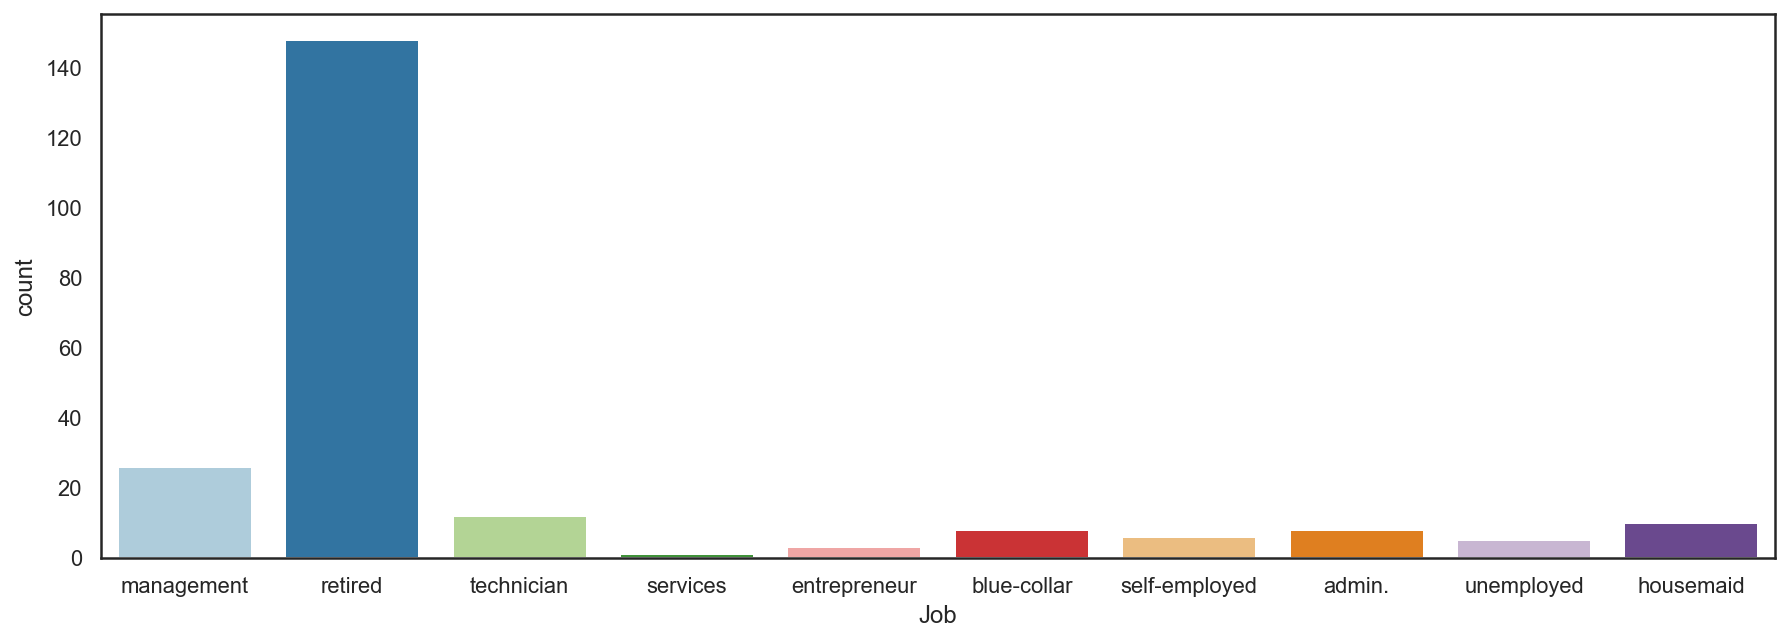

In [298]:
with sns.axes_style('white'):
    plt.figure(figsize=(15,5))
    sns.countplot(Miss_Handle_Last_df.Job, palette = 'Paired')

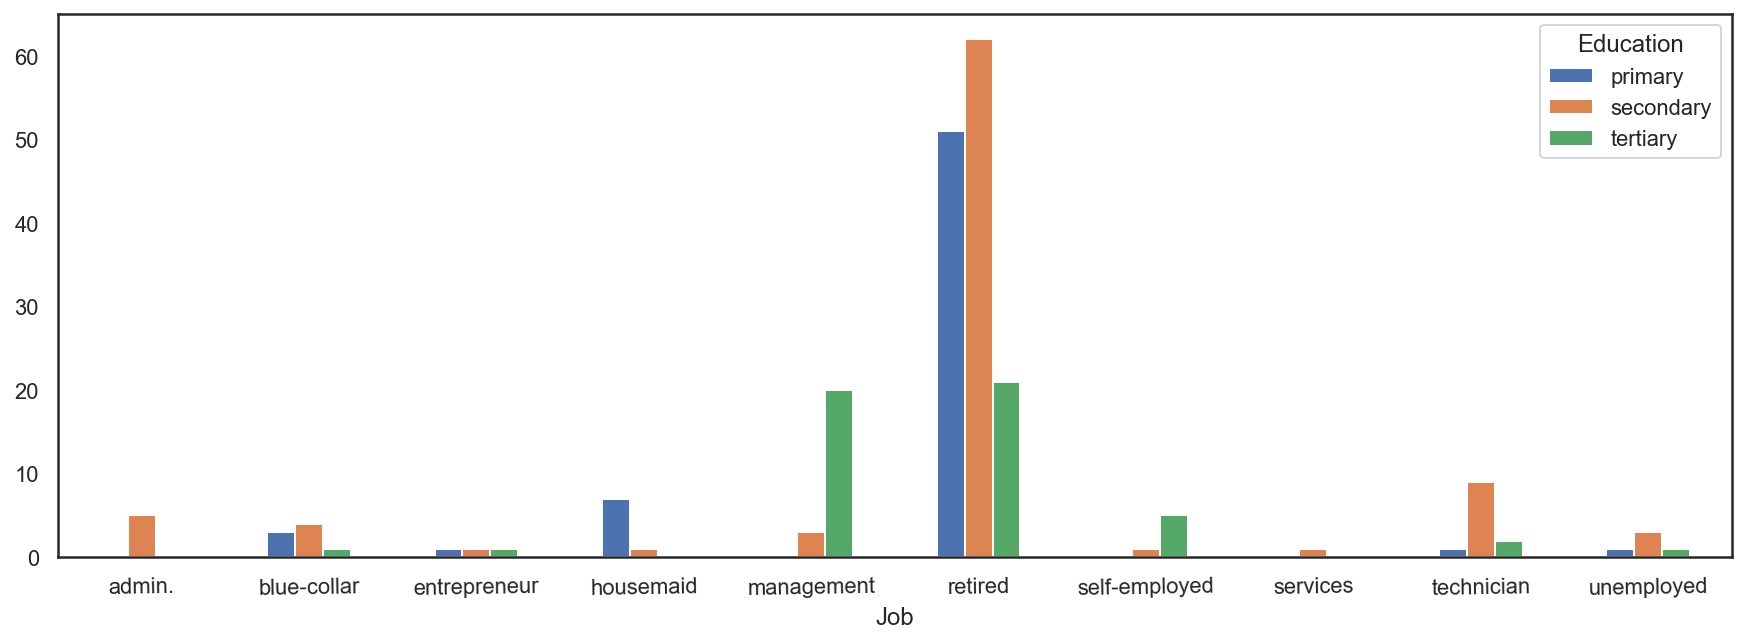

In [299]:
with sns.axes_style('white'):
    pd.crosstab(Miss_Handle_Last_df.Job, Miss_Handle_Last_df.Education).plot(kind = 'bar' , rot =1, figsize=(15,5))

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


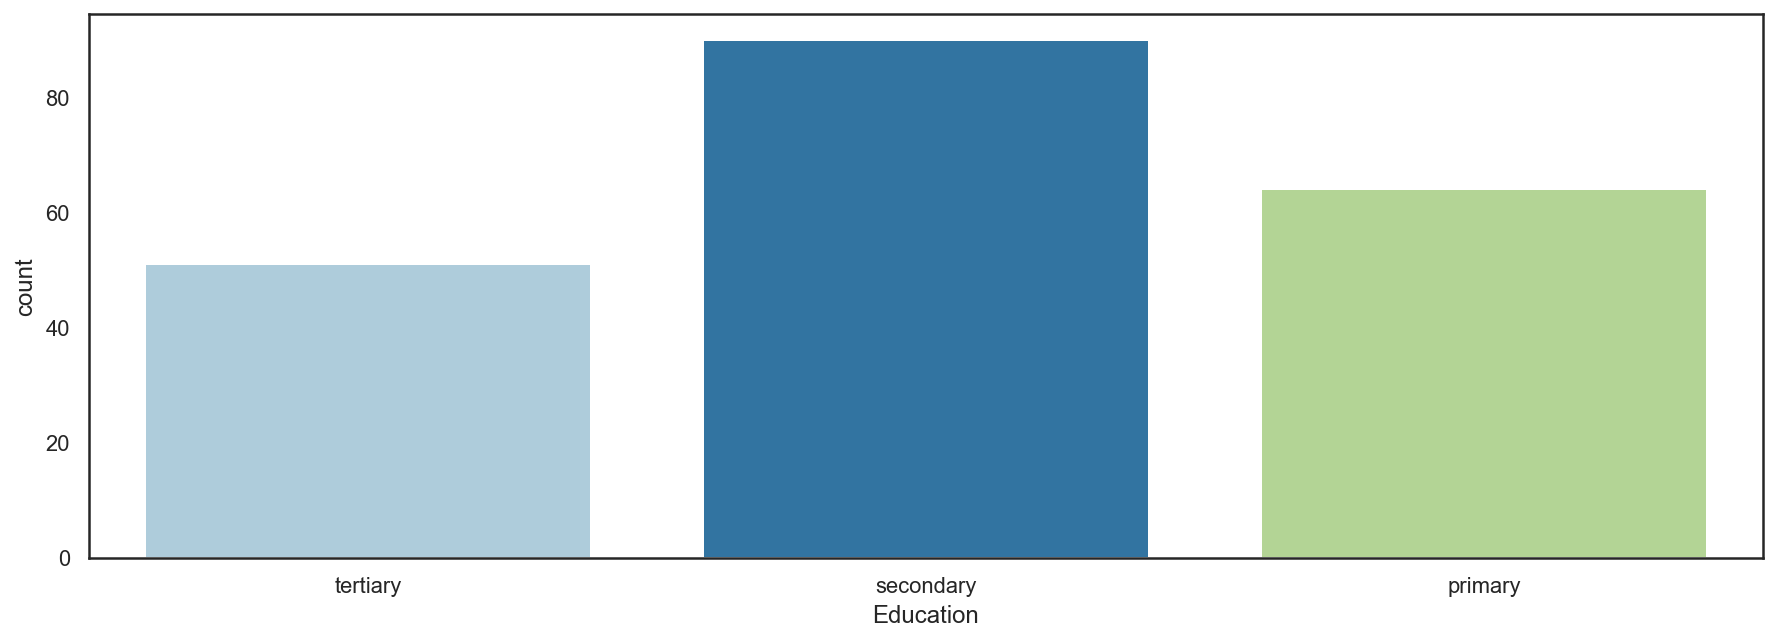

In [300]:
with sns.axes_style('white'):
    plt.figure(figsize=(15,5))
    sns.countplot(Miss_Handle_Last_df.Education, palette = 'Paired')

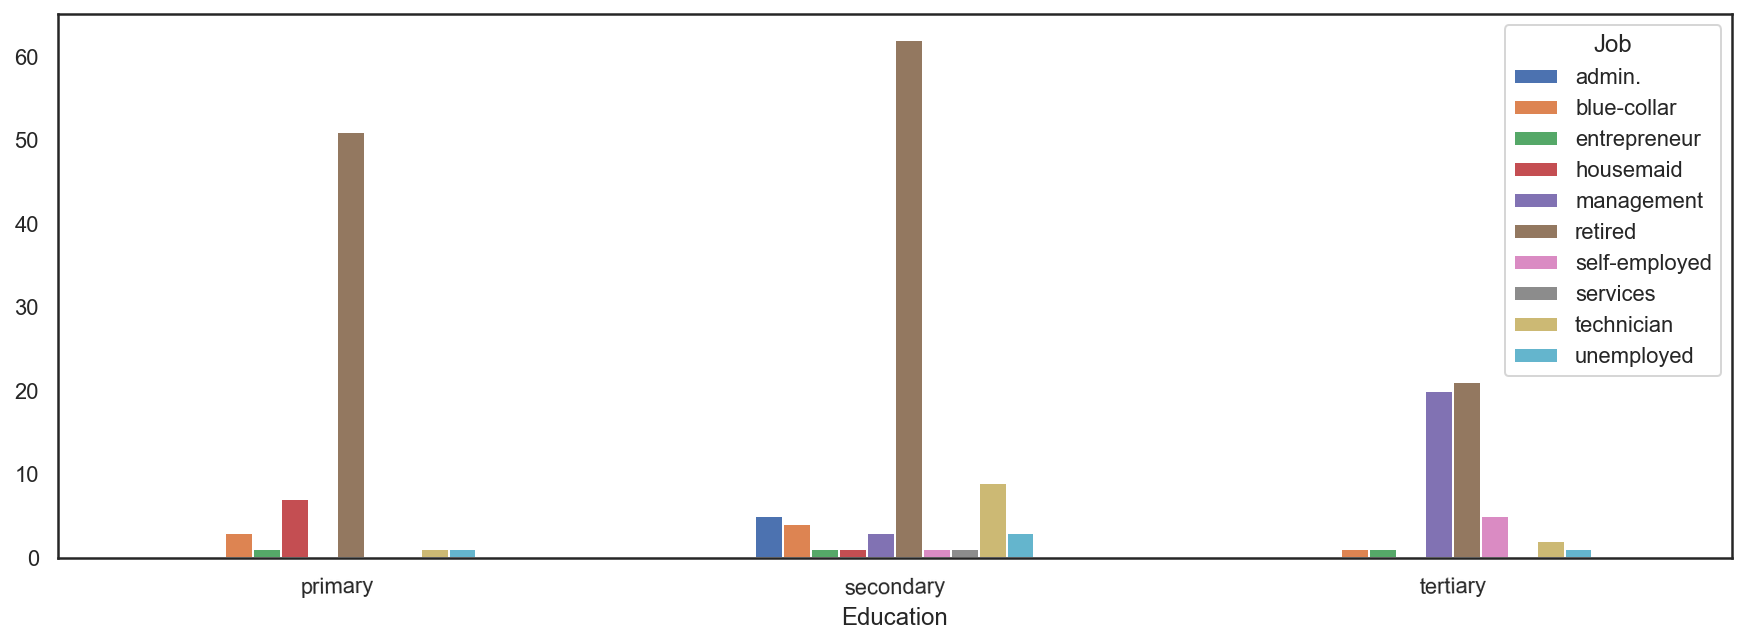

In [301]:
with sns.axes_style('white'):
    pd.crosstab(Miss_Handle_Last_df.Education, Miss_Handle_Last_df.Job).plot(kind = 'bar' , rot =1, figsize=(15,5))

In [302]:
# 노년층의 경우는 Job은 retired, Educaion은 secondary

In [303]:
retired_ls = Miss_Handle_Last_df[(Miss_Handle_Last_df['Job'].isna())].index

In [304]:
Miss_Handle_df.loc[retired_ls]

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,Call_StartHour,Call_Duration
2941,78,NaN,married,NaN,0,2235,0,0,telephone,14,apr,3,-1,0,NonePrev,16,5.0


In [305]:
Miss_Handle_df.loc[retired_ls, 'Job'] = 'retired'

In [306]:
Miss_Handle_df.loc[retired_ls]

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,Call_StartHour,Call_Duration
2941,78,retired,married,NaN,0,2235,0,0,telephone,14,apr,3,-1,0,NonePrev,16,5.0


In [307]:
Education_ls = Miss_Handle_Last_df[(Miss_Handle_Last_df['Education'].isna())].index

In [308]:
Miss_Handle_df.loc[Education_ls]

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,Call_StartHour,Call_Duration
53,78,retired,married,NaN,0,3208,0,0,telephone,20,may,3,-1,0,NonePrev,16,5.850000
405,77,retired,married,NaN,0,992,0,0,cellular,27,apr,2,182,2,failure,13,2.450000
422,64,retired,married,NaN,0,2923,0,0,cellular,12,mar,1,-1,0,NonePrev,9,2.000000
791,60,housemaid,married,NaN,0,2769,0,0,cellular,13,aug,2,-1,0,NonePrev,12,1.600000
1040,67,retired,married,NaN,0,2540,0,0,telephone,14,jun,5,116,4,other,11,4.633333
1281,63,management,married,NaN,0,2352,0,0,telephone,4,may,7,-1,0,NonePrev,10,7.916667
1656,60,retired,married,NaN,0,1396,0,1,cellular,26,aug,2,-1,0,NonePrev,10,1.733333
1810,73,retired,married,NaN,0,739,0,0,cellular,11,sep,1,-1,0,NonePrev,13,3.500000
1872,60,admin.,married,NaN,0,478,0,0,cellular,19,jul,2,311,8,failure,16,2.883333
1970,69,retired,married,NaN,0,426,0,0,telephone,9,dec,1,-1,0,NonePrev,11,6.583333


In [309]:
Miss_Handle_df.loc[Education_ls, 'Education'] = 'secondary'

In [310]:
Miss_Handle_df.loc[Education_ls]

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,Call_StartHour,Call_Duration
53,78,retired,married,secondary,0,3208,0,0,telephone,20,may,3,-1,0,NonePrev,16,5.850000
405,77,retired,married,secondary,0,992,0,0,cellular,27,apr,2,182,2,failure,13,2.450000
422,64,retired,married,secondary,0,2923,0,0,cellular,12,mar,1,-1,0,NonePrev,9,2.000000
791,60,housemaid,married,secondary,0,2769,0,0,cellular,13,aug,2,-1,0,NonePrev,12,1.600000
1040,67,retired,married,secondary,0,2540,0,0,telephone,14,jun,5,116,4,other,11,4.633333
1281,63,management,married,secondary,0,2352,0,0,telephone,4,may,7,-1,0,NonePrev,10,7.916667
1656,60,retired,married,secondary,0,1396,0,1,cellular,26,aug,2,-1,0,NonePrev,10,1.733333
1810,73,retired,married,secondary,0,739,0,0,cellular,11,sep,1,-1,0,NonePrev,13,3.500000
1872,60,admin.,married,secondary,0,478,0,0,cellular,19,jul,2,311,8,failure,16,2.883333
1970,69,retired,married,secondary,0,426,0,0,telephone,9,dec,1,-1,0,NonePrev,11,6.583333


In [311]:
Miss_Handle_Last_df = Miss_Handle_df[(Miss_Handle_df.Age > 60)]

In [312]:
Miss_Handle_Last_df.isna().sum()

Age                 0
Job                 0
Marital             0
Education           0
Default             0
Balance             0
HHInsurance         0
CarLoan             0
Communication       0
LastContactDay      0
LastContactMonth    0
NoOfContacts        0
DaysPassed          0
PrevAttempts        0
Outcome             0
Call_StartHour      0
Call_Duration       0
dtype: int64

In [313]:
###### 결측치 재 확인 #####
Miss_Handle_df.isna().sum()

Age                   0
Job                   0
Marital               0
Education             0
Default               0
Balance               0
HHInsurance           0
CarLoan               0
Communication       897
LastContactDay        0
LastContactMonth      0
NoOfContacts          0
DaysPassed            0
PrevAttempts          0
Outcome               0
Call_StartHour        0
Call_Duration         0
dtype: int64

In [314]:
list(np.unique(Miss_Handle_df.Job))

['admin.',
 'blue-collar',
 'entrepreneur',
 'housemaid',
 'management',
 'retired',
 'self-employed',
 'services',
 'student',
 'technician',
 'unemployed']

In [315]:
list(np.unique(Miss_Handle_df.Education))

['primary', 'secondary', 'tertiary']

In [316]:
####### 여기까지 결측치 처리 Job, Education 완료 #####

## Missing : Communication

In [317]:
# Communication의 결측치는 cellular로 대체한다. 빈도수가 제일 많음

In [318]:
Communication_ls = Miss_Handle_df[(Miss_Handle_df['Communication'].isna())].index

In [319]:
Miss_Handle_df.loc[Communication_ls, 'Communication'] = 'cellular'

In [320]:
list(np.unique(Miss_Handle_df.Communication))

['cellular', 'telephone']

In [321]:
#### 모든 결측치 제거